In [1]:
!pip install --force-reinstall --no-deps ../dist/faisst_denstream-0.0.8-py3-none-any.whl

Processing /Users/jake/repos/faisst-denstream/dist/faisst_denstream-0.0.8-py3-none-any.whl
  Attempting uninstall: faisst-denstream
    Found existing installation: faisst-denstream 0.0.8
    Uninstalling faisst-denstream-0.0.8:
      Successfully uninstalled faisst-denstream-0.0.8

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from loguru import logger
from faisst_denstream.DenStream import DenStream
from random import random
from sys import stdout
from sklearn.model_selection import ParameterGrid
from dbcv import dbcv
from collections import Counter
from random import randint

In [3]:
logger.remove()

<Axes: >

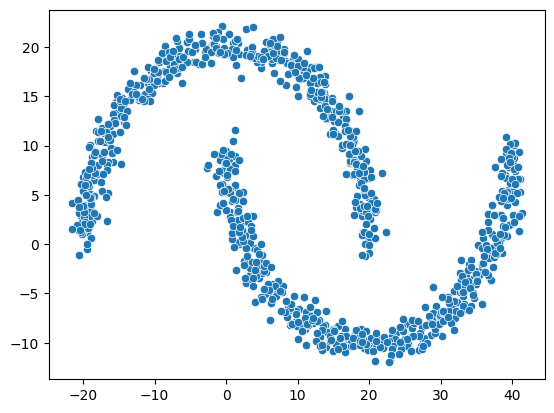

In [4]:
#data = []
#for _ in range(10):
#    data.append(np.random.normal(randint(0, 30), randint(0, 5), size=(500, 2)))

#data = np.vstack(data)

data, _ = sklearn.datasets.make_moons(n_samples=1000, noise=0.05, random_state=1782)
data *= 20
np.random.shuffle(data)

sns.scatterplot(x=data[:,0], y=data[:,1])

In [5]:
def clustering_grid_search(model_class, data, param_grid):
    best_score = -1
    best_params = None
    best_model = None

    for params in ParameterGrid(param_grid):
        try:
            model = model_class(**params)
            labels = model.fit_predict(data)
    
            # Silhouette score requires at least 2 clusters
            num_clusters = len(set(labels)) - 1 # for outliers
            if num_clusters > 1:
                score = dbcv(data, labels, check_duplicates=False)
            else:
                score = -1

            if score > 0 and num_clusters > 1:
                print(model.get_params())
                print(f"DBCV: {score:.4f}\tnum clusters: {num_clusters}")
    
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        except:
            continue

    return best_model, best_params, best_score

In [6]:
grid = {
    "lamb": [0.01],
    "beta": [0.2, 0.3],
    "mu": [10, 50, 60, 100],
    "epsilon": [3, 4, 5, 10, 15],
    "n_init_points": [100],
    "stream_speed": [1],
}

#best_model, best_params, best_score = clustering_grid_search(DenStream, data, grid)
#print(best_score)
#print(best_params)

In [11]:
model = DenStream(
    mu=40,
    beta=0.3,
    epsilon=2,
    n_init_points=500,
    lamb=0.01,
    stream_speed=1
)

model.fit(data[:500])
preds = model.predict(data[:500])

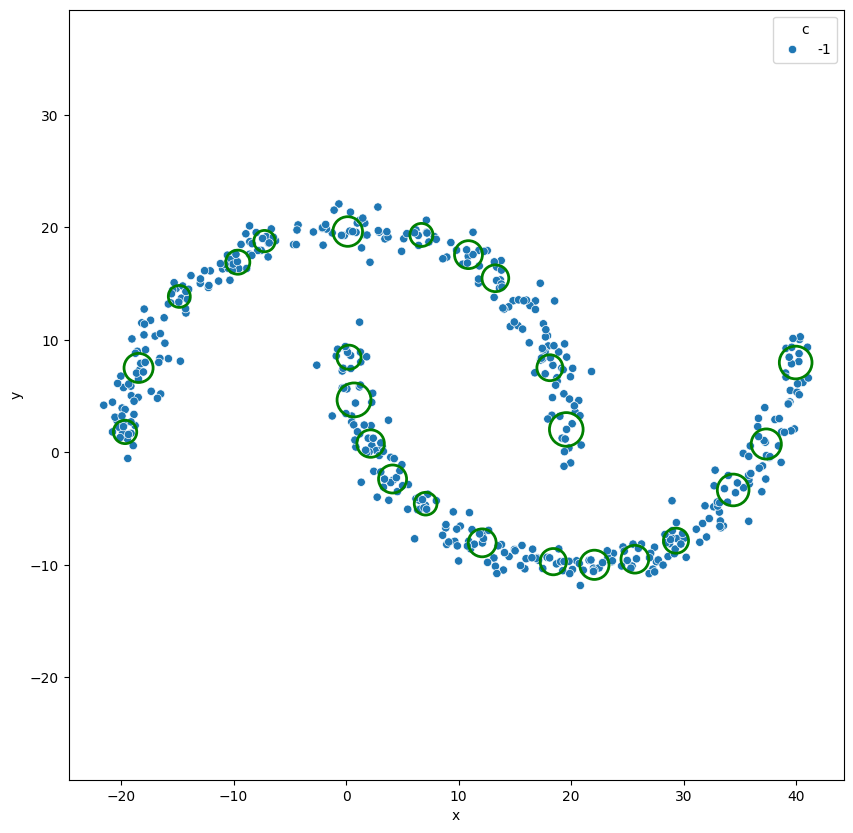

In [12]:
points = []
clusters = []
for point, pred in zip(data, preds):
    #if pred != -1:
    points.append(point)
    clusters.append(pred)

out = pd.DataFrame(data=points, columns=['x', 'y'])
out['c'] = clusters

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=out, x='x', y='y', hue='c', palette='tab10')

for pmc in model.pmc:
    ax.add_patch(plt.Circle(pmc.center, pmc.radius, color='green', fill=False, lw=2))

for omc in model.omc:
    ax.add_patch(plt.Circle(pmc.center, pmc.radius, color='red', fill=False, lw=2))

ax.set_aspect('equal', adjustable='datalim')

In [13]:
preds = model.fit_predict(data[500:])

1.1514848344722963 1.1742087604508702
1.0698509703737424 1.3166824737452754
1.3163872302953137 1.2692088406517308
1.0253538317885664 0.990321970768357
0.9490887008078439 1.1262459681132815
1.3404817295382063 1.3872715797204116
1.1742087604508702 1.1676240304856087
1.2405749160118982 1.2510303048179507
1.0380344014859624 1.007665782759941
1.1894597456206397 1.20053068328976
1.1147241424983476 1.3334183736746046
1.20053068328976 1.185842383505476
1.4962673055326616 1.5100320311621536
0.9753231626821485 1.2674886875321691
1.3334183736746046 1.4147828168843977
0.990321970768357 1.0222757770863897
1.007665782759941 1.001375334627258
1.5100320311621536 1.4720773244918033
1.29223536840268 1.4156018629422662
1.2674886875321691 1.3085954493248824
1.4720773244918033 1.5115281870217605
1.1683606951337788 1.1504233261027228
1.4531271145927669 1.5940546326903757
1.4147828168843977 1.391988284448342
1.0222757770863897 1.0887784720952354
1.4098387985731247 1.3629528689328856
1.2204924318485595 1.2248

In [16]:
model.fit_predict(np.array([[100, 200]]))

[43]

In [17]:
model.omc

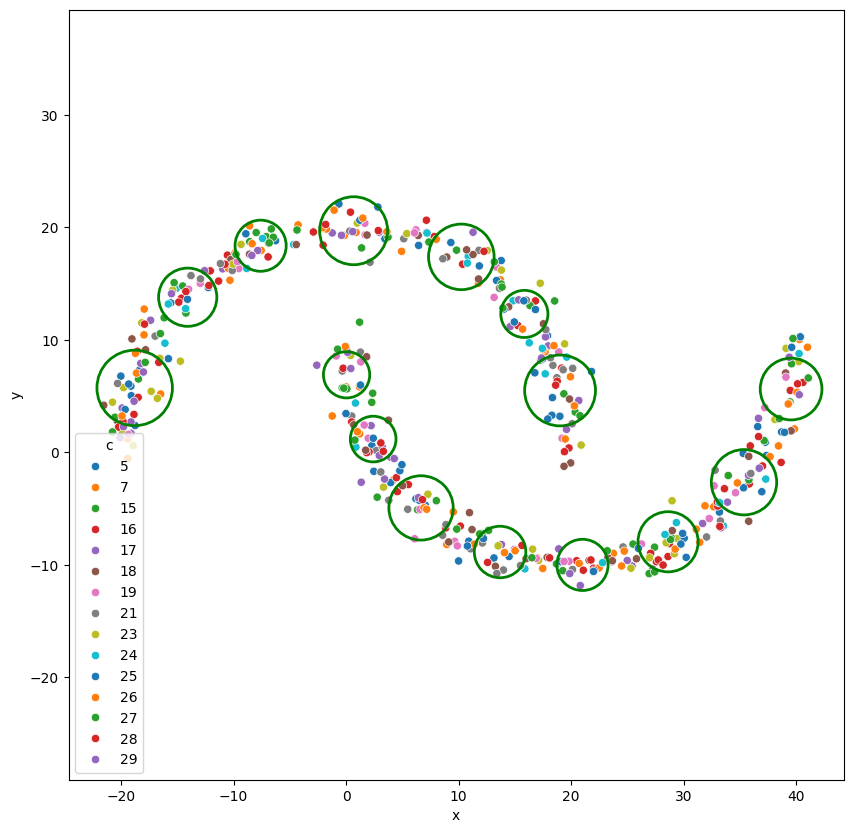

In [10]:
points = []
clusters = []
for point, pred in zip(data, preds):
    #if pred != -1:
    points.append(point)
    clusters.append(pred)

out = pd.DataFrame(data=points, columns=['x', 'y'])
out['c'] = clusters

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=out, x='x', y='y', hue='c', palette='tab10')

for pmc in model.pmc:
    ax.add_patch(plt.Circle(pmc.center, pmc.radius, color='green', fill=False, lw=2))

for omc in model.omc:
    ax.add_patch(plt.Circle(pmc.center, pmc.radius, color='red', fill=False, lw=2))

ax.set_aspect('equal', adjustable='datalim')